## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

## Loading the dataset

In [2]:
# Loading the dataset form the local system
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data = pd.DataFrame(data)
# Getting the insight about the dataset
data.head()
data.shape

(5110, 12)

## Pre-processing of data

As we can see that there are lots of columns with string values, so to evaluate and process them in our model, we need to convert them into numerical values.

###### Gender 
0 for male, 1 for female, and 2 for others
###### Marital status
0 for unmarried, 1 for married
###### Work type
0 for children, 1 for never-worked, 2 for Govt. job, 3 for Private job, 4 for Self-employed
###### Residence type
0 for Rural, 1 for Urban
###### Smoking status
0 for nan, 1 for never smoked, 2 for formerly smoked, 3 for smokes

In [3]:
# As we have 5 columns where data is present as strings, so lets convert them in the numerical values as per decided conventions

# Replacing values for Gender column
data['gender'] = data['gender'].replace(['Male', 'Female', 'Other'], [0, 1, 2])

# Replacing the values for Marital status column
data['ever_married'] = data['ever_married'].replace(['Yes', 'No'], [1, 0])

# Replacing values for Work type column
data['work_type'] = data['work_type'].replace(['children', 'Never_worked', 'Govt_job', 'Private', 'Self-employed'],
                                              [0, 1, 2, 3, 4])

# Replacing values for Residence type column
data['Residence_type'] = data['Residence_type'].replace(['Rural', 'Urban'], [0, 1])

# Replacing values for smoking status column
data['smoking_status'] = data['smoking_status'].replace(['0', 'never smoked', 'formerly smoked', 'smokes'], [0, 1, 2, 3])

data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,3,1,228.69,36.6,2,1
1,51676,1,61.0,0,0,1,4,0,202.21,NaN,1,1
2,31112,0,80.0,0,1,1,3,0,105.92,32.5,1,1
3,60182,1,49.0,0,0,1,3,1,171.23,34.4,3,1
4,1665,1,79.0,1,0,1,4,0,174.12,24.0,1,1
5,56669,0,81.0,0,0,1,3,1,186.21,29.0,2,1
6,53882,0,74.0,1,1,1,3,0,70.09,27.4,1,1
7,10434,1,69.0,0,0,0,3,1,94.39,22.8,1,1
8,27419,1,59.0,0,0,1,3,0,76.15,NaN,0,1
9,60491,1,78.0,0,0,1,3,1,58.57,24.2,0,1


In [4]:
# As we can see that id column is just a unique number and isn't contributing to the model evaluation by any means
# So we'll just drop that column
data = data.drop(['id'], axis=1)
data.head()
data.shape

(5110, 11)

In [5]:
# Checking that if there exists any null values in the datset or not
print(data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Now, upon observing that the bmi column contains a lot of null values, and 201 to be specific, 
lets fill those null/empty values with the mean of the column

In [6]:
# Filling the null values with median of the particular row
data['bmi'].fillna(data['bmi'].median(), inplace = True)
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,1,228.69,36.6,2,1
1,1,61.0,0,0,1,4,0,202.21,28.1,1,1
2,0,80.0,0,1,1,3,0,105.92,32.5,1,1
3,1,49.0,0,0,1,3,1,171.23,34.4,3,1
4,1,79.0,1,0,1,4,0,174.12,24.0,1,1
5,0,81.0,0,0,1,3,1,186.21,29.0,2,1
6,0,74.0,1,1,1,3,0,70.09,27.4,1,1
7,1,69.0,0,0,0,3,1,94.39,22.8,1,1
8,1,59.0,0,0,1,3,0,76.15,28.1,0,1
9,1,78.0,0,0,1,3,1,58.57,24.2,0,1


OK, now we have all the data in numerical form, so lets perform some more data pre-processing techniques to make it a good dataset

In [7]:
# Checking, that if there exists any duplicate rows or not
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows before dropping them: ", duplicate_rows.shape) 

Number of duplicate rows before dropping them:  (0, 11)


<AxesSubplot:xlabel='stroke', ylabel='count'>

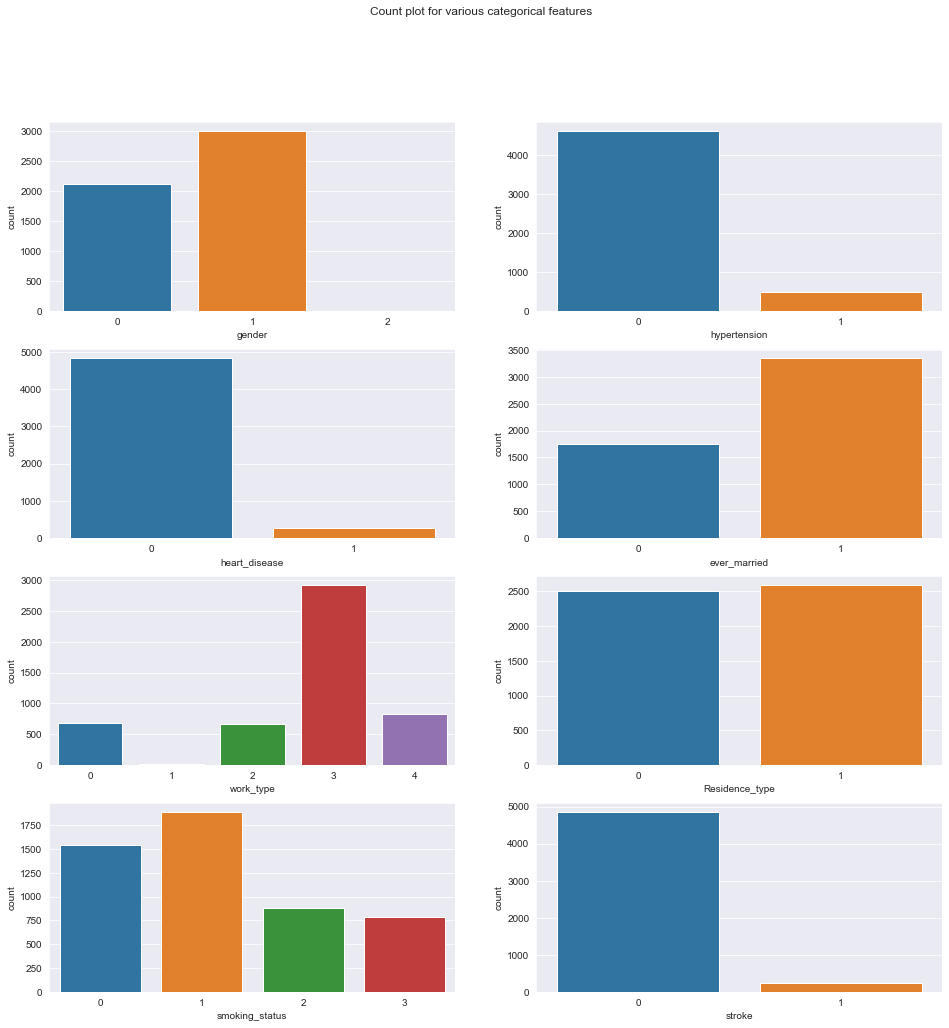

In [11]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=data,x='gender')
sns.countplot(ax=axes[0,1],data=data,x='hypertension')
sns.countplot(ax=axes[1,0],data=data,x='heart_disease')
sns.countplot(ax=axes[1,1],data=data,x='ever_married')
sns.countplot(ax=axes[2,0],data=data,x='work_type')
sns.countplot(ax=axes[2,1],data=data,x='Residence_type')
sns.countplot(ax=axes[3,0],data=data,x='smoking_status')
sns.countplot(ax=axes[3,1],data=data,x='stroke')

C:\Users\Snehil Seenu\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Snehil Seenu\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Snehil Seenu\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

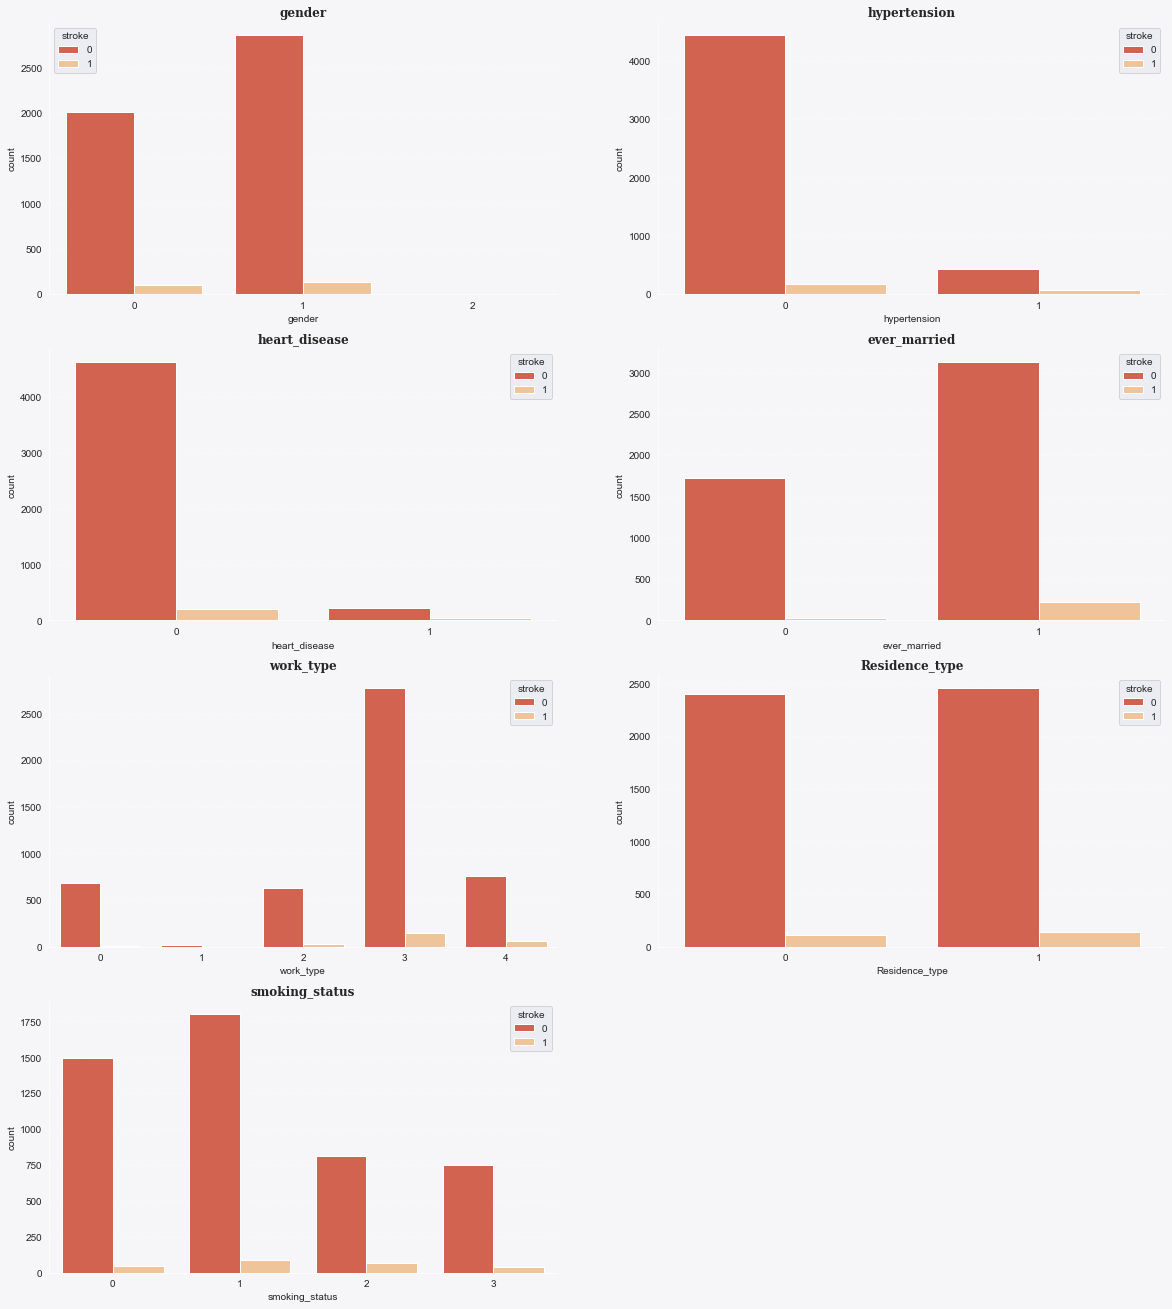

In [12]:
data_categories = data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status']]
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categories.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_categories[val],palette='OrRd_r',hue=data['stroke'])

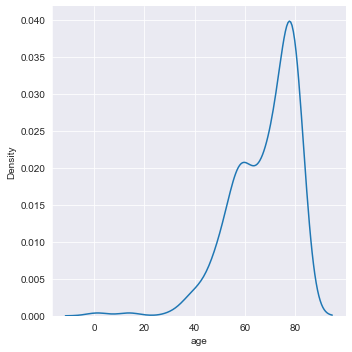

In [13]:
stroke = data[data['stroke']==1]
sns.displot(stroke.age, kind='kde')
plt.show()

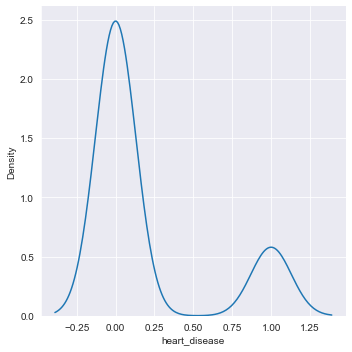

In [14]:
stroke = data[data['stroke']==1]
sns.displot(stroke.heart_disease, kind='kde')
plt.show()

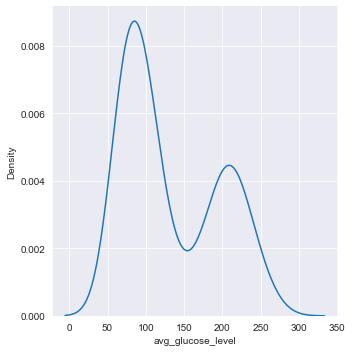

In [16]:
stroke = data[data['stroke']==1]
sns.displot(stroke.avg_glucose_level, kind='kde')
plt.show()

## Building models for the classification

In [17]:
# Now, building models for classification
x = data.drop("stroke", axis=1)
y = data['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


# Logistic Regression
log_reg = LogisticRegression(random_state=0, solver='liblinear')
log_reg.fit(x_train, y_train)
yhat_log_reg = log_reg.predict(x_test)
print(f"Predicted classes using Logistic Regression: ", yhat_log_reg)

print('')

# Random Forest
rand_for = RandomForestClassifier(n_estimators=500)
rand_for.fit(x_train,y_train)
yhat_rand_for = rand_for.predict(x_test)
print(f"Predicted classes using random forest: ", yhat_rand_for)

Predicted classes using Logistic Regression:  [0 0 0 ... 0 0 0]

Predicted classes using random forest:  [0 0 0 ... 0 0 0]


## Checking accuracies of the classifiers

In [41]:
#Models and their accuracy
print("Logistic Regression :: ", metrics.accuracy_score(y_test,yhat_log_reg))
print("Random Forest :: ", metrics.accuracy_score(y_test, yhat_rand_for))

Logistic Regression ::  0.949119373776908
Random Forest ::  0.9497716894977168
